<a href="https://colab.research.google.com/github/rajantripathi/Machine-Learning-projects/blob/master/ML_based_classfication_of_BC_subtype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                         Accuracy  Precision    Recall  F1-score   AUC-ROC
Model                                                                     
Logistic Regression      0.973684   0.972222  0.985915  0.979021  0.997380
Support Vector Machines  0.973684   0.972222  0.985915  0.979021  0.997380
Decision Trees           0.947368   0.957746  0.957746  0.957746  0.943990
Random Forest            0.964912   0.958904  0.985915  0.972222  0.994595
Gradient Boosting        0.956140   0.958333  0.971831  0.965035  0.994432


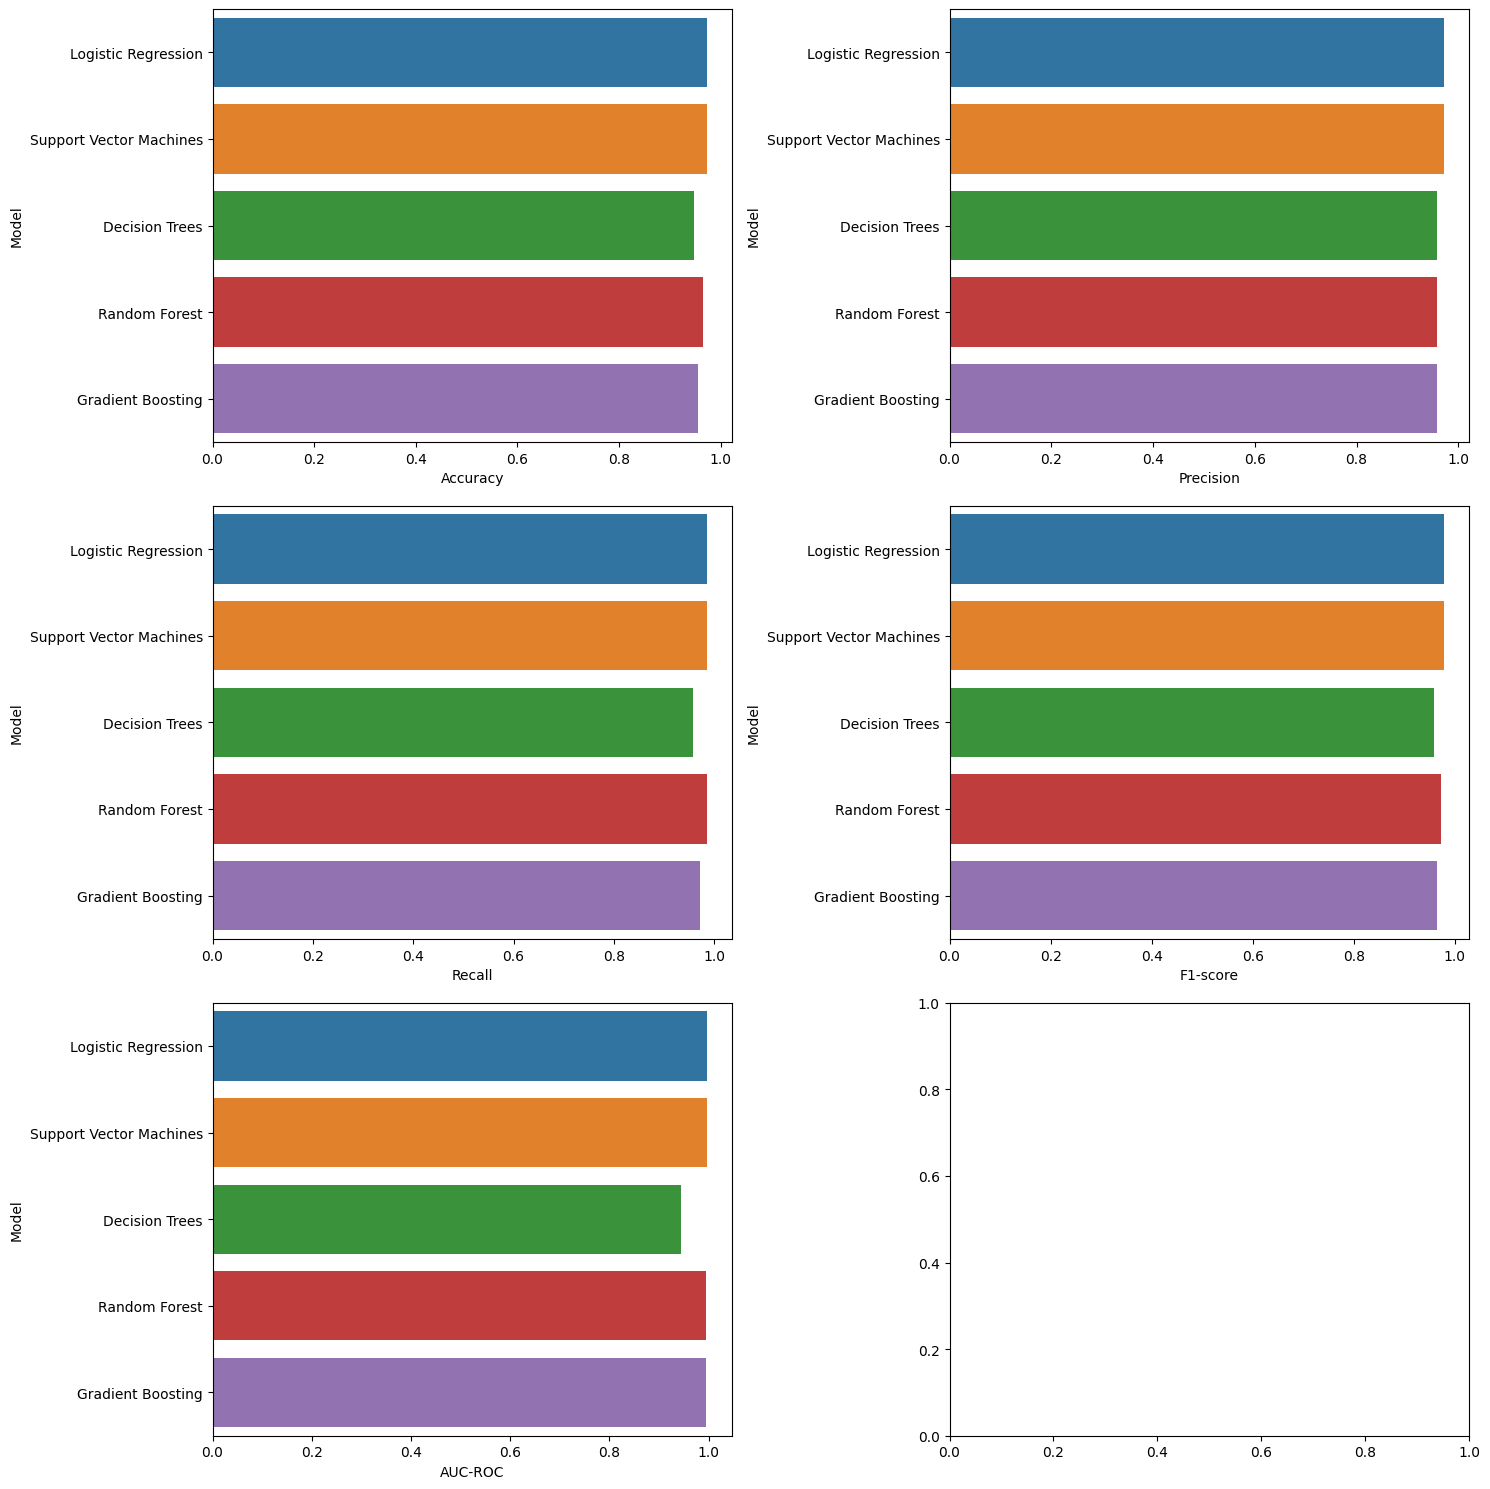

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC(probability=True),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC-ROC': auc_roc
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')
print(results_df)

# Visualize the results
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=metric, y=results_df.index, data=results_df, ax=ax)
    ax.set_xlabel(metric)
    ax.set_ylabel('Model')

plt.tight_layout()
plt.show()


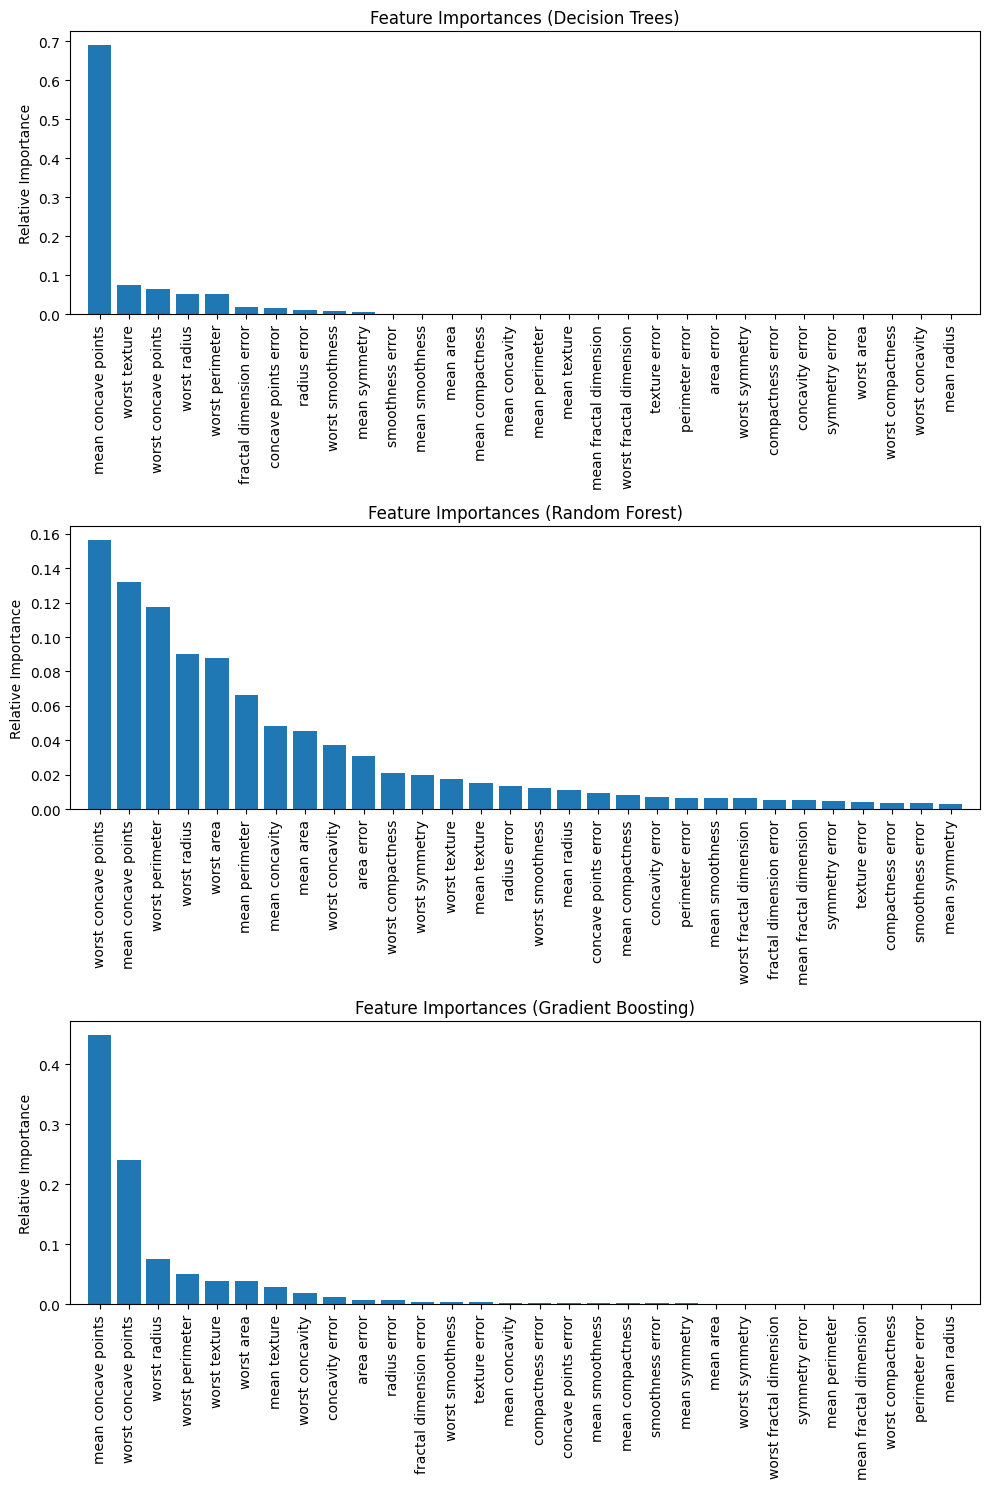

In [15]:
# Function to plot feature importances
def plot_feature_importances(model, model_name, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    ax.set_title(f'Feature Importances ({model_name})')
    ax.bar(range(X.shape[1]), importances[indices], align='center')
    ax.set_xticks(range(X.shape[1]))
    ax.set_xticklabels(feature_names[indices], rotation=90)
    ax.set_xlim([-1, X.shape[1]])
    ax.set_ylabel('Relative Importance')

# Models that support feature importances
models_with_importances = {
    'Decision Trees': models['Decision Trees'],
    'Random Forest': models['Random Forest'],
    'Gradient Boosting': models['Gradient Boosting']
}

# Plot feature importances
fig, axes = plt.subplots(len(models_with_importances), 1, figsize=(10, 5 * len(models_with_importances)))
feature_names = np.array(data.feature_names)

for i, (name, model) in enumerate(models_with_importances.items()):
    plot_feature_importances(model, name, feature_names, axes[i])

plt.tight_layout()
plt.show()


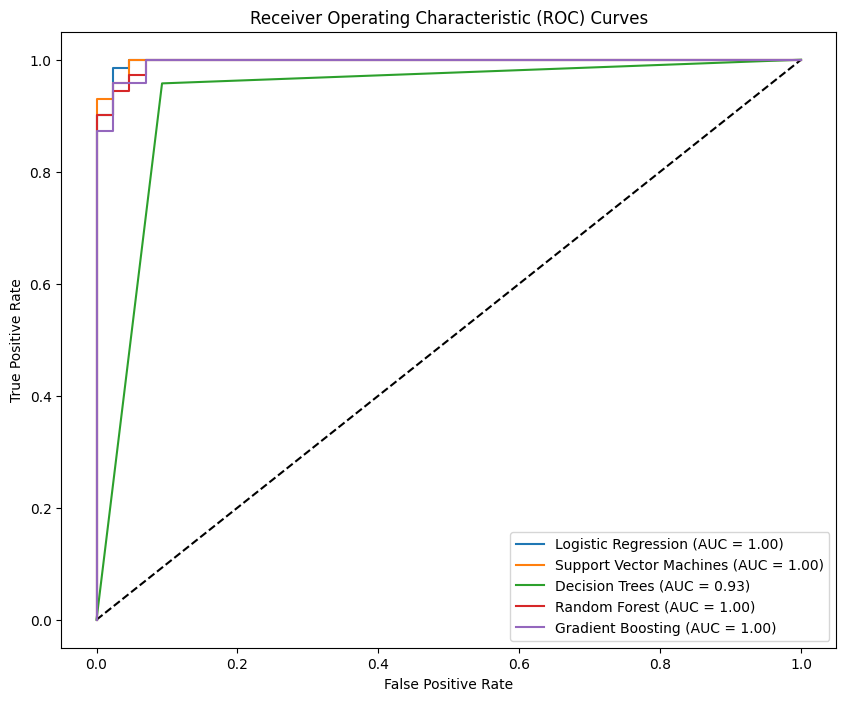

In [14]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [5]:
# Identify the best-performing model
best_model_name = results_df['AUC-ROC'].idxmax()
best_model = models[best_model_name]

print(f"Best-performing model: {best_model_name}")

# Calculate feature importances for the best-performing model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)

    # Visualize feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(range(X.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(X.shape[1]), data.feature_names[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importances for {best_model_name}')
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")


Best-performing model: Logistic Regression
Logistic Regression does not support feature importances.


In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter search space for the best-performing model
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
elif best_model_name == 'Support Vector Machines':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
elif best_model_name == 'Decision Trees':
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [3, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(best_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Update the best-performing model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the updated best-performing model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Updated {best_model_name} performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Updated Logistic Regression performance:
Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
F1-score: 0.9930
AUC-ROC: 0.9987


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol